## Importing libs

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## Importing ang exploring data

In [2]:
df = pd.read_csv("ml_project1_data.csv")

In [60]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Month
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2216.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,4353.937613
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,2097.756388
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,144.166667
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2941.916667
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4281.791667
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5710.166667
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,55555.500000


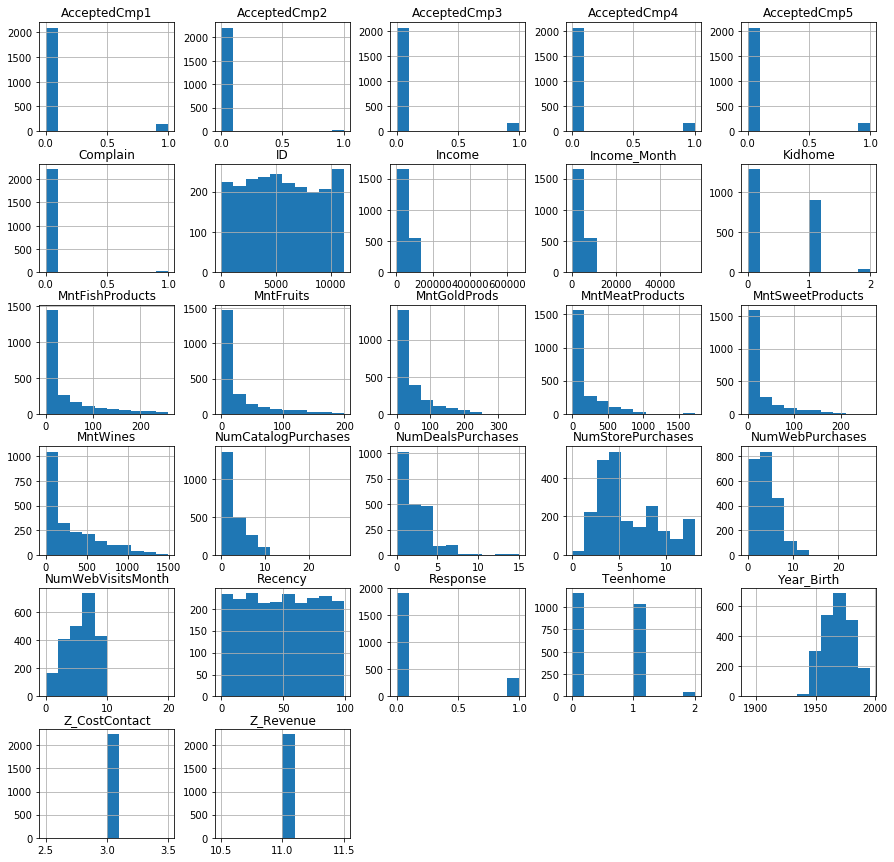

In [65]:
_ = df.hist(figsize=(15,15))

__Considering that Campaign__ 2 seems to have been much worse than the other campaings so it would probably be better to not rely on this column.  

In [70]:
campaigns = ['AcceptedCmp' + str(i) for i in range(1,6)]
campaigns

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']

In [76]:
for i,x in enumerate(campaigns): 
    print('campaign ' + str(i+1) + ' had ' + str(df[x].mean()*100) + ' % of acceptance')

campaign 1 had 6.428571428571428 % of acceptance
campaign 2 had 1.3392857142857142 % of acceptance
campaign 3 had 7.276785714285714 % of acceptance
campaign 4 had 7.455357142857142 % of acceptance
campaign 5 had 7.276785714285714 % of acceptance


### Age distribution

In [47]:
(df['Year_Birth']>1980).mean()

0.171875

In [4]:
df[df['Year_Birth']>1990]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,9,0,0,0,0,0,0,3,11,1
111,7431,1991,PhD,Single,68126.0,0,0,2012-11-10,40,1332,...,9,0,1,0,0,0,0,3,11,1
113,999,1991,Graduation,Single,86037.0,0,0,2013-01-02,95,490,...,3,0,1,1,0,0,0,3,11,1
140,821,1992,Master,Single,92859.0,0,0,2012-10-19,46,962,...,2,0,0,0,0,0,0,3,11,0
309,1379,1992,Master,Together,42670.0,0,0,2013-04-27,12,154,...,4,0,0,0,0,0,0,3,11,0
392,2669,1993,Graduation,Single,74293.0,0,0,2014-05-04,66,375,...,2,0,0,0,0,0,0,3,11,0
395,3428,1991,PhD,Together,68682.0,0,0,2013-10-06,56,919,...,2,0,0,0,0,0,0,3,11,0
417,5067,1994,Graduation,Together,80134.0,0,0,2014-02-14,11,966,...,5,0,1,1,1,1,0,3,11,0
508,3386,1992,Graduation,Married,34935.0,0,0,2013-06-21,71,34,...,7,0,0,0,0,0,0,3,11,0
522,9214,1991,Graduation,Married,42691.0,0,0,2013-08-16,48,179,...,5,0,0,0,0,0,0,3,11,0


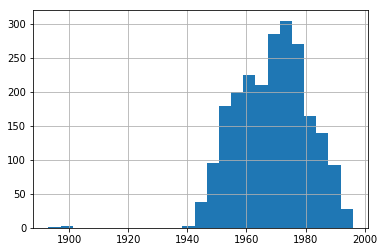

In [51]:
df['Year_Birth'].hist(bins=25)

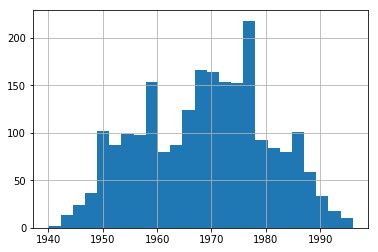

In [54]:
df[df['Year_Birth']>1930]['Year_Birth'].hist(bins=25)

In [16]:
df['Income_Month'] = df['Income']/12

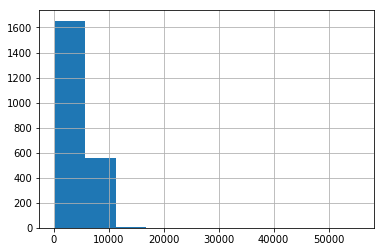

In [19]:
df['Income_Month'].hist(bin60s=10,)

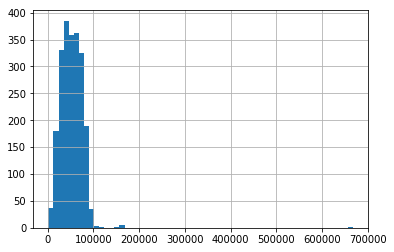

In [15]:
df['Income'].hist(bins=60)

## Structuring 

All ids are filled

In [28]:
df['ID'].count()

2240

We have 98.92% of respondents for Income

In [36]:
df['Income'].notna().mean()

0.9892857142857143

It means that we have 1.07% of non-respondents 

In [37]:
df['Income'].isna().sum()

24

Are these ones who didn't inform their Income from a certain age? No. 

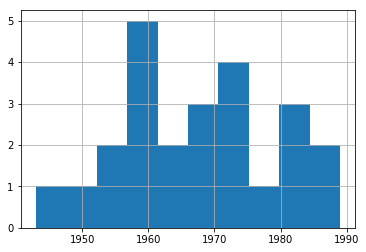

In [40]:
df[df['Income'].isna()]['Year_Birth'].hist()

Lets take a look at the columns. Are they filled well?

In [77]:
columns = df.columns

In [84]:
for i,x in enumerate(columns):
    percentage = df[x].isna().mean()*100
    if percentage != 0.0:
        print(x + ' is ' + str(percentage) + '% NaN')
    else: 
        print(x + ' is all filled! o//')

ID is all filled! o//
Year_Birth is all filled! o//
Education is all filled! o//
Marital_Status is all filled! o//
Income is 1.0714285714285714% NaN
Kidhome is all filled! o//
Teenhome is all filled! o//
Dt_Customer is all filled! o//
Recency is all filled! o//
MntWines is all filled! o//
MntFruits is all filled! o//
MntMeatProducts is all filled! o//
MntFishProducts is all filled! o//
MntSweetProducts is all filled! o//
MntGoldProds is all filled! o//
NumDealsPurchases is all filled! o//
NumWebPurchases is all filled! o//
NumCatalogPurchases is all filled! o//
NumStorePurchases is all filled! o//
NumWebVisitsMonth is all filled! o//
AcceptedCmp3 is all filled! o//
AcceptedCmp4 is all filled! o//
AcceptedCmp5 is all filled! o//
AcceptedCmp1 is all filled! o//
AcceptedCmp2 is all filled! o//
Complain is all filled! o//
Z_CostContact is all filled! o//
Z_Revenue is all filled! o//
Response is all filled! o//
Income_Month is 1.0714285714285714% NaN


That's good. Just the column Income has missing values. 

In [29]:
df.shape

(2240, 30)

In [32]:
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Month
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,4844.833333
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,3862.000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,5967.750000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,2220.500000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,4857.750000
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,3,11,0,5209.416667
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,4636.250000
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,0,0,0,0,0,3,11,0,2787.833333
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,2529.250000
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,3,11,0,470.666667


In [97]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Income_Month           float64
dtype: object

In [103]:
(df['Z_CostContact']==3).mean()

1.0

In [105]:
(df['Z_Revenue']==11).mean()

1.0

All values of Z_CostContact and Z_Revenue are 3 or 11 respectively, so we'll drop these columns

In [106]:
df.drop(columns=['ID','Z_CostContact','Z_Revenue','Income_Month'], inplace=True)

In [111]:
df_copy = df.copy()

As we have __categorical__ variables we'll turn them into dummy variables

In [110]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

They're Education and Marital Status

In [112]:
cat_columns = ['Education', 'Marital_Status']
for i in cat_columns:
    dummy = pd.get_dummies(df[i])
    df = pd.concat([df,dummy], axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,1,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,0,1,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,1,0,0,0,1,0,0,0,0


In [116]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [117]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

We can see we have a small problem of input, but lets keep with these values

In [120]:
df.drop(columns=['Marital_Status','Education'], inplace=True)

## Exploring

In [107]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,1,-0.161791,0.230176,-0.352111,-0.0198711,-0.157773,-0.0179172,-0.0308724,-0.0416254,-0.0181326,-0.0618182,-0.0608456,-0.14504,-0.121275,-0.128272,0.121139,0.0617745,-0.0605096,0.00712254,-0.00593032,-0.00653928,-0.0301275,0.0213252
Income,-0.161791,1,-0.428669,0.0191334,-0.00396976,0.57865,0.430842,0.584633,0.438871,0.440744,0.325916,-0.0831009,0.387878,0.589162,0.529362,-0.553088,-0.0161744,0.1844,0.335943,0.27682,0.0875448,-0.0272245,0.133047
Kidhome,0.230176,-0.428669,1,-0.0361331,0.00882673,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.0146744,-0.1616,-0.205634,-0.172339,-0.0817164,0.0402065,-0.0800078
Teenhome,-0.352111,0.0191334,-0.0361331,1,0.0161977,0.00484641,-0.176764,-0.26116,-0.204187,-0.162475,-0.0217253,0.387741,0.1555,-0.110769,0.0506952,0.134884,-0.0426769,0.0388864,-0.19105,-0.14009,-0.0156049,0.00313771,-0.154446
Recency,-0.0198711,-0.00396976,0.00882673,0.0161977,1,0.0160639,-0.00430564,0.0230561,0.00107897,0.0226696,0.0166933,-0.00109837,-0.0107263,0.0251105,0.000798836,-0.0214447,-0.0329906,0.0188256,0.000128909,-0.0192828,-0.00178133,0.0132311,-0.198437
MntWines,-0.157773,0.57865,-0.496297,0.00484641,0.0160639,1,0.389637,0.562667,0.399753,0.386581,0.387516,0.0109399,0.542265,0.635226,0.6421,-0.320653,0.0622018,0.373286,0.472613,0.354133,0.205907,-0.0390071,0.247254
MntFruits,-0.0179172,0.430842,-0.372581,-0.176764,-0.00430564,0.389637,1,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.0147269,0.0101522,0.215833,0.194748,-0.00977322,-0.00516629,0.125289
MntMeatProducts,-0.0308724,0.584633,-0.437129,-0.26116,0.0230561,0.562667,0.543105,1,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.53947,0.0182718,0.102912,0.373769,0.309761,0.0430334,-0.0234831,0.236335
MntFishProducts,-0.0416254,0.438871,-0.387644,-0.204187,0.00107897,0.399753,0.594804,0.568402,1,0.57987,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357226,0.0168428,0.199578,0.260762,0.0025767,-0.0209528,0.111331
MntSweetProducts,-0.0181326,0.440744,-0.370673,-0.162475,0.0226696,0.386581,0.567164,0.523846,0.57987,1,0.369724,-0.1201,0.348544,0.490924,0.448756,-0.423294,0.00152995,0.0286407,0.25959,0.241818,0.00998523,-0.022485,0.117372


- Fish is more positively correlated with fruits (0.5948) than with wine (0.3998)
- Parents having children or teenagers at home tend to spend less money in general but they also tend to purchase more using deals and to visit the website
- Catalog seems like the channel where people use to spend more money in general
- People who buy wine tend to accept more the campaigns
- The number of web visits per month is negativelly correlated with the money spent by the custumer, as well as the custumer income

## Modelling

In [139]:
from sklearn.cluster import KMeans
import numpy as np

Using the elbow method to find the optimum number of clusters

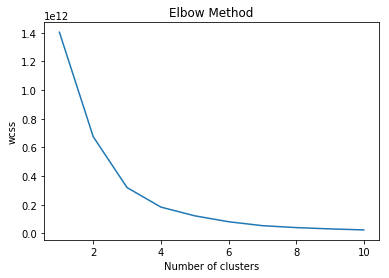

In [125]:
from sklearn.cluster import KMeans
wcss = []
X = df.drop(axis=0, columns=['Dt_Customer']).dropna()
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Let's go with 4 clusters

In [127]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

In [131]:
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0
5,1967,62513.0,0,1,16,520,42,98,0,42,...,1,0,0,0,0,0,0,1,0,0
6,1971,55635.0,0,1,34,235,65,164,50,49,...,0,0,0,0,1,0,0,0,0,0
7,1985,33454.0,1,0,32,76,10,56,3,1,...,0,1,0,0,0,1,0,0,0,0
8,1974,30351.0,1,0,19,14,0,24,3,3,...,0,1,0,0,0,0,0,1,0,0
9,1950,5648.0,1,1,68,28,0,6,1,1,...,0,1,0,0,0,0,0,1,0,0


In [132]:
X.shape

(2216, 36)

In [133]:
y_means.shape

(2216,)

In [141]:
X = X.as_matrix(columns=X.columns)

/Users/ianca/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(array([743.,   0.,   0., 785.,   0.,   0., 687.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

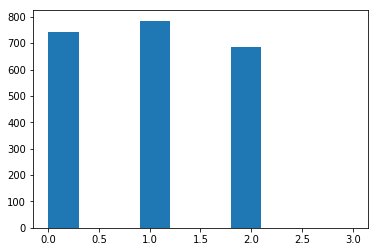

In [148]:
plt.hist(y_means, bins=10)

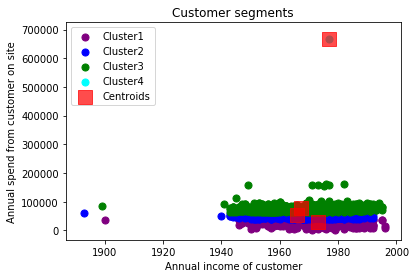

In [142]:
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()

A scatter plot doesn't solve our visualization problem. Let's go with a biplot and a coordinate plot. 

Also, there is an outlier over there. Let's identify who is it!